### Project 1: (10 points)
#####  your total (60 points) will divided by 6 to get 10 points for this project.

### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide.
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted.

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---


### Dataset:
you can find the dataset on Canvas under Dataset section: Instagram_Data

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [50]:
# write you code here
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data.

Otherwise, your execution time for each command will be long since the data has 178922 samples.

In [51]:
# write you code here
insta_df = pd.read_csv('Instagram_Data.csv', nrows=2000)
insta_df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,5/12/19 21:18,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,5/12/19 14:25,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,5/3/19 15:18,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,5/2/19 16:40,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,4/25/19 16:51,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,8/25/20 18:09,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,8/18/20 2:39,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,8/17/20 1:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,8/14/20 18:48,2020,8,14,18,48


    3- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)

In [52]:
# 10 first rows of the data
insta_df.head(10)

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,5/12/19 21:18,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,5/12/19 14:25,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,5/3/19 15:18,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,5/2/19 16:40,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,4/25/19 16:51,2019,4,25,16,51
5,1,539,677,0.79,Images,3,3,4/22/19 20:03,2019,4,22,20,3
6,1,330,677,0.49,Image,0,3,4/22/19 15:07,2019,4,22,15,7
7,1,472,681,0.69,Images,3,7,4/18/19 14:44,2019,4,18,14,44
8,1,272,682,0.40,Image,0,0,4/17/19 15:42,2019,4,17,15,42
9,1,304,688,0.45,Images,3,0,4/11/19 15:00,2019,4,11,15,0


In [53]:
# insta_df shape
insta_df.shape

(2000, 13)

In [54]:
# insta_df column names
insta_df.columns

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

    4- Check the number of samples in the dataset (1 point)

In [55]:
# insta_df row numbers:
len(insta_df)


2000

    5- Check the data type of each column ( 1 point)

In [56]:
# Print datatypes
insta_df.dtypes

User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

    6- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points)

In [57]:
# Remove User uuid
del insta_df['User uuid']
# insta_df = insta_df.drop("User uuid", axis=1)

# Remove User Likes Score
del insta_df['Likes Score']
# insta_df = insta_df.drop("Likes Score", axis=1)

# Remove all columns between column index 1 to 3
# del insta_df["Date Posted", "Year", "Month", "Day", "Hour", "Minute"]
insta_df = insta_df.drop(columns=["Date Posted", "Year", "Month", "Day", "Hour", "Minute"])

# show the insta_df after you remove the required columns
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,Image,3,11
1,385,657,Image,0,1
2,373,666,Images,4,15
3,312,667,Images,4,1
4,513,674,Images,5,0
...,...,...,...,...,...
1995,58,186,Image,0,84
1996,81,193,Video,4,5
1997,251,194,Image,4,13
1998,962,197,Images,0,38


    7- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [58]:
# write you code here
len(insta_df["Type"].unique()) 
    

3

    8- Use label encoder to change the "Type" coulmn values to numeric values (2 point)

In [87]:
# Encode "Type"


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Type" column
insta_df.Type = label_encoder.fit_transform(insta_df.Type)

##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,0,3,11
1,385,657,0,0,1
2,373,666,1,4,15
3,312,667,1,4,1
4,513,674,1,5,0
...,...,...,...,...,...
1995,58,186,0,0,84
1996,81,193,2,4,5
1997,251,194,0,4,13
1998,962,197,1,0,38


    9- Check how many NaN values are in each column:

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [61]:
# a. How many NaNs as total
insta_df.isnull().sum().sum()

0

In [64]:
# b. How many NaNs as a percentage of overall data
(insta_df.isnull().sum().sum() / len(insta_df)) * 100

0.0

    10- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [65]:
# your featuers X:

##
X = insta_df.loc[:, insta_df.columns != 'Likes']

In [66]:
# your target y:



##
y = insta_df.loc[:,'Likes']

    11- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

/var/folders/f9/y0mhfv4j00gf0f68kn0d04ch0000gq/T/ipykernel_42639/3036195132.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = insta_df.corr().round(2)


<Axes: >

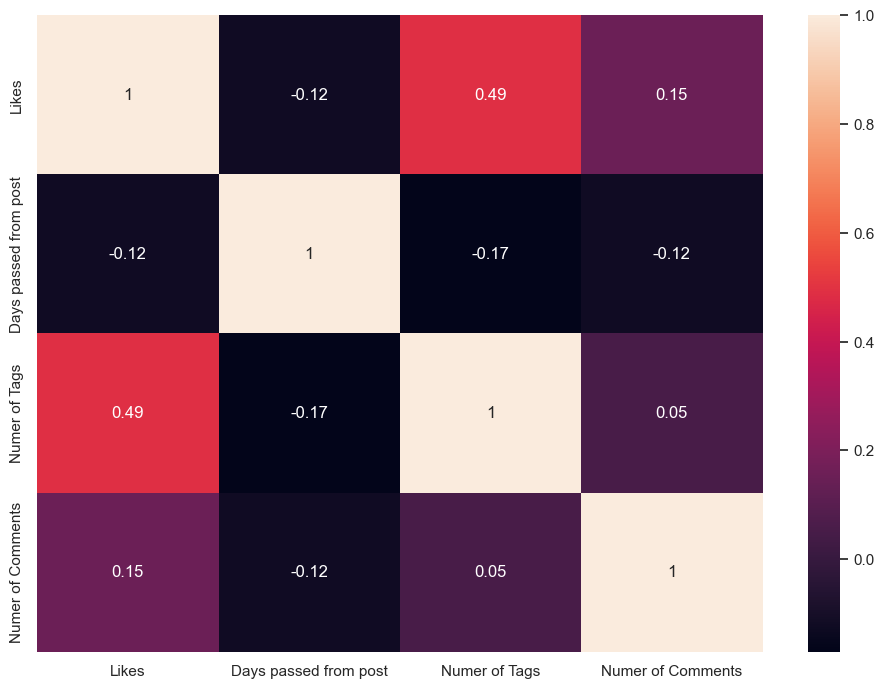

In [67]:
# write your code here:
corr = insta_df.corr().round(2)
#corr.style.background_gradient(cmap='coolwarm')
# or
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=corr, annot=True)

    12- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:

--


--

    13- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

In [ ]:
# write your code here

    14- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:

--


--

    15- Display the target distribution using histogram (1 points)

In [ ]:
# write your code here:

    16- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:

--


--

    17-Transfer the target y into log to have the normal distributions: (1 point)

In [ ]:
#transfer the target y into log


### Preparing the machine learning pipeline


    18- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [ ]:
# Splitting the data:

# print the sizes of our training and test set:


    19- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [ ]:
# writer your code here:

    20- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [ ]:
# write your code here:


        B. Lasso:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

In [ ]:
# write your code here:


#### Robust regression

      21- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [ ]:
# write your code here:


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [ ]:
# write your code here:


    22- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:

--


--

    23- Use the Best model to build/fit your final model using your train-data.(5 points)

In [ ]:
# write your code here:


    24- Predict the number of likes for test data and compute the MSE (5 points)

In [ ]:
# write your code here:


    25- Write a conclusion about building a good model for predicting the number of likes using Instagram Users Datetime Posts. (10 points)

       your conclusion should include:
        * why a specific model performs better than other models and why a regression algorithm works well with this dataset.
        * Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?

    Write a summary of what you understand about linear regression and cross-validation.

--

--

---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_1 .
---